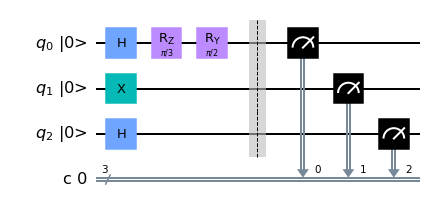

In [2]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister
from qiskit import (QuantumCircuit, execute, Aer, assemble)
from qiskit.visualization import plot_histogram, plot_bloch_multivector

sim = Aer.get_backend('qasm_simulator')

qc=QuantumCircuit(3,3)

qc.h(0)
qc.rz(np.pi/3,0)
qc.ry(np.pi/2,0)
qc.x(1)
qc.h(2)

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw(output ='mpl', initial_state=True,  scale=1)

{'111': 341, '011': 415, '110': 135, '010': 133}


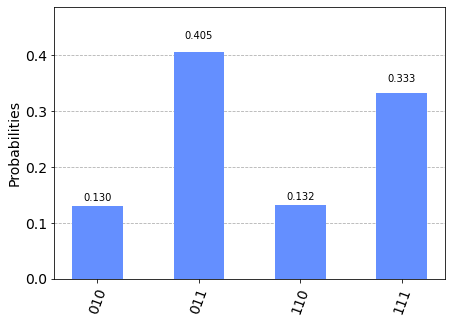

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024, memory = True).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


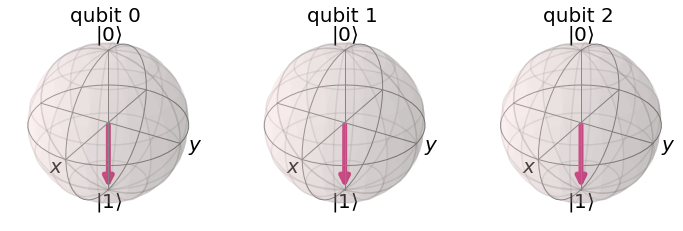

In [5]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [6]:
# Real Quantum Computers
from qiskit import IBMQ

# used only for first time, then you should use IBMQ.load_account()
# TOKEN = 'smth from IBM API token'
# IBMQ.save_account(TOKEN)

IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')

In [9]:
job = execute(
    qc, 
    backend=device, 
    shots=1024, 
    memory = True)

print(f'{job.job_id() = }')
from qiskit.tools.monitor import job_monitor
# Status of real job in real Quantum Computer
job_monitor(job)

job.job_id() = '60769b20b74072bc89e927c0'
Job Status: job has successfully run


{'111': 341, '011': 415, '110': 135, '010': 133}


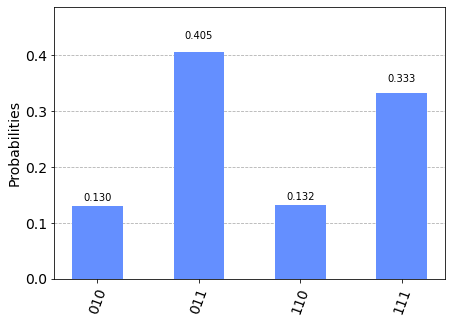

In [10]:
device_result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


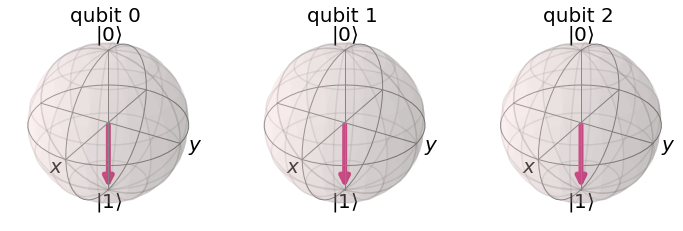

In [12]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)